In [1]:
%matplotlib inline
%run init.py

Loading places/bristol25
Loading Telford and Wrekin
Loading Caerphilly
Loading City of Edinburgh
Loading York
Loading Renfrewshire
Loading Medway
Loading Bridgend
Loading Redcar and Cleveland
Loading City of Bristol
Loading Swindon
Loading Newport
Loading Yell
Loading Stockton-on-Tees
Loading North East Lincolnshire
Loading Windsor and Maidenhead
Loading Darlington
Loading Aberdeen City
Loading Thurrock
Loading West Dunbartonshire
Loading Warrington
Loading Wokingham
Loading Lewes
Loading North Warwickshire
Loading Rotherham
Loading Warwick District
Loading North West Leicestershire
Loading Charnwood
Loading North East Derbyshire
Loading Guildford
Loading Birmingham
Loading Amber Valley
Loading Rochford
Loading Mole Valley
Loading Wirral District
Loading Tandridge
Loading Tonbridge and Malling
Loading Kettering
Loading Arun
Loading Bromsgrove
Loading Hart
Loading Dacorum
Loading Newcastle-under-Lyme
Loading Sefton
Loading Chorley
Loading Chiltern
Loading Wyre Forest
Loading Wigan
Loadi

Could not normalise for N
Could not normalise for W
Qmf2
1 nan zeroed.
Qmb
5 nan zeroed.
Q50b
0 nan zeroed.
Q90b
0 nan zeroed.


/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:46: RuntimeWarning: invalid value encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: RuntimeWarning: invalid value encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:1957: RuntimeWarning: invalid value encountered in true_divide
  return c / sqrt(multiply.outer(d, d))
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:1897: RuntimeWarning: invalid value encountered in subtract
  X -= X.mean(axis=1-axis, keepdims=True)


([<matplotlib.axis.YTick at 0x10f0c6cd0>,
 <a list of 34 Text yticklabel objects>)

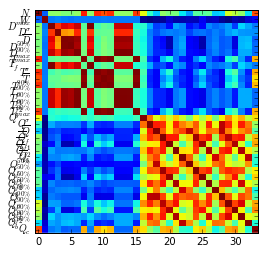

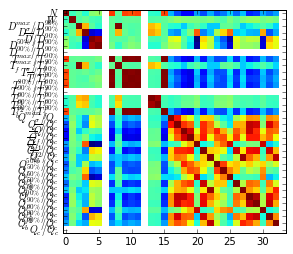

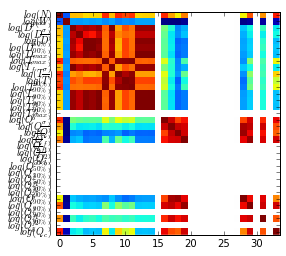

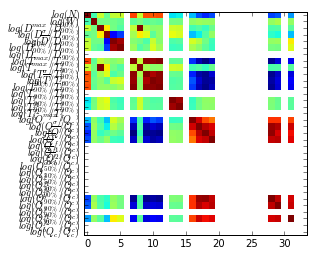

In [2]:
# Remove all the nan values because they are supposed to be 0
def nan2zero(M):
    filter = np.isnan(M)
    print sum(filter), 'nan zeroed.'
    M = np.array(M)
    M[filter] = 0
    return M

# Define required variables

normdict = {'D':'D90','T':'T90f','Q':'Qp'}

mat = []
normmat = []
logmat = []
lognormmat = []

nl = {}
npl = {}

for l in lab:
    m = R[l]
    # Remove nan from the following labels
    if l in ['Qmb','Q50b','Q90b','Qmf2','Tp']:
        print l
        m = nan2zero(m)
        
    # Normalising vector
    try:
        # label to normalise with
        nw = normdict[l[0]]
        # matrix to normalise with
        n = R[nw]
        # labels
        nl[l] = '{0}/{1}'.format(l,nw)
        npl[l] = '{0}/{1}'.format(pl[l],pl[nw])
    except KeyError:
        n = 1.
        nl[l] = l
        npl[l] = pl[l]
        print 'Could not normalise for',l
        
    mat.append(m)
    normmat.append(m/n) 
    
    logmat.append(np.log(m))
    lognormmat.append(np.log(m/n)) 
        
cor = np.corrcoef(mat)
normcor = np.corrcoef(normmat)
logcor = np.corrcoef(logmat)
lognormcor = np.corrcoef(lognormmat)

plt.figure()
plt.imshow(cor,interpolation="none")
plt.yticks(range(len(lab)),['${0}$'.format(pl[l]) for l in lab])

plt.figure()
plt.imshow(normcor,interpolation="none")
plt.yticks(range(len(lab)),['${0}$'.format(npl[l]) for l in lab])

plt.figure()
plt.imshow(logcor,interpolation="none")
plt.yticks(range(len(lab)),['$log({0})$'.format(pl[l]) for l in lab])

plt.figure()
plt.imshow(lognormcor,interpolation="none")
plt.yticks(range(len(nl)),['$log({0})$'.format(npl[l]) for l in lab])    

In [3]:
# Function to plot which against all the other labels
def plot_corr(which,norm=True):
    index = lab.index(which)    
    for m,nm,lm,lnm,c,nc,lc,lnc,l in zip(mat,normmat,logmat,lognormmat,cor[index],normcor[index],logcor[index],lognormcor[index],lab):

        fontsize = 15
        
        c = abs(c)**2
        if c > 0.5:
            x = mat[index]
            y = m
            labx = '${0}$'.format(pl[lab[index]])
            laby = '${0}$'.format(pl[l])
                        
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='b')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()    

        c = abs(lc)**2
        if c > 0.5:        
            x = logmat[index]
            y = lm
            labx = '$log({0})$'.format(pl[lab[index]])
            laby = '$log({0})$'.format(pl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='g')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend() 

        c = abs(nc)**2
        if c > 0.5:        
            x = normmat[index]
            y = nm
            labx = '${0}$'.format(npl[lab[index]])
            laby = '${0}$'.format(npl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='r')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()       

        c = abs(lnc)**2
        if c > 0.5:        
            x = lognormmat[index]
            y = lnm
            labx = '$log({0})$'.format(npl[lab[index]])
            laby = '$log({0})$'.format(npl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='y')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()                 

- log(Qp) vs log(Qmf), R = 0.90
- log(Qmf/Qp) vs log(T90/T90f), R = 0.90

/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


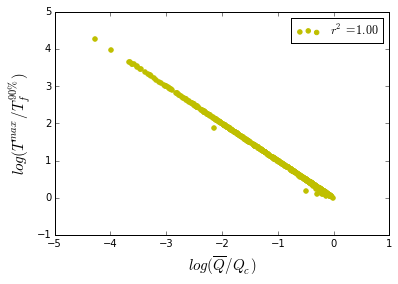

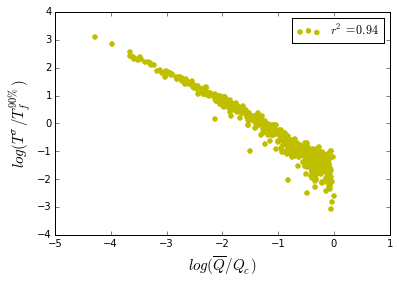

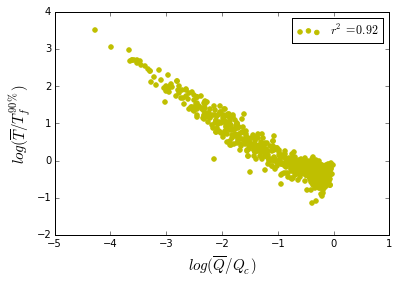

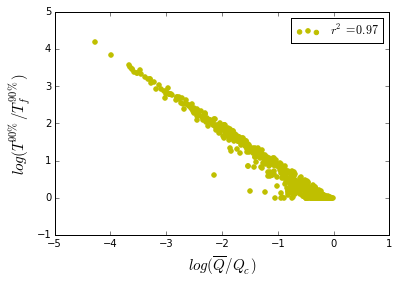

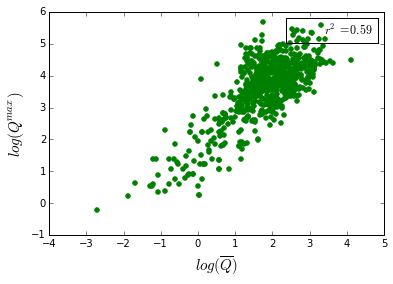

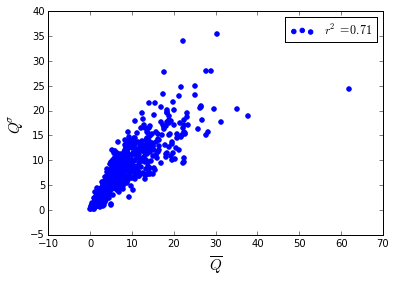

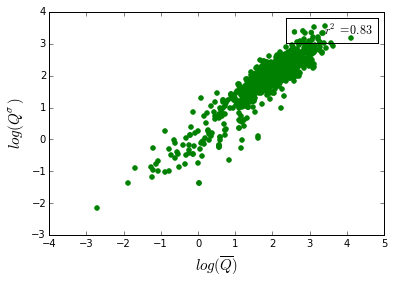

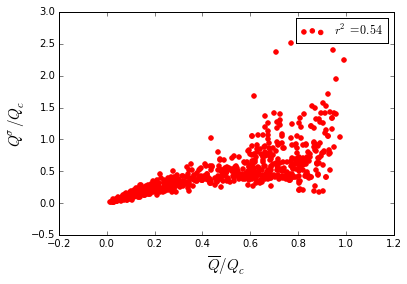

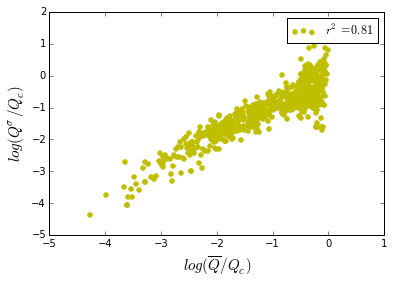

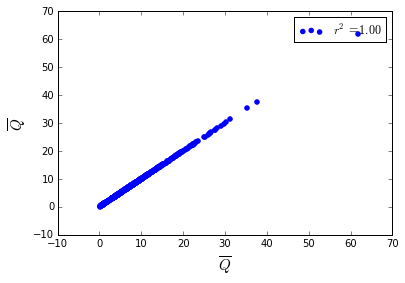

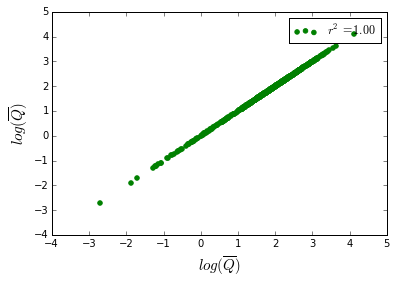

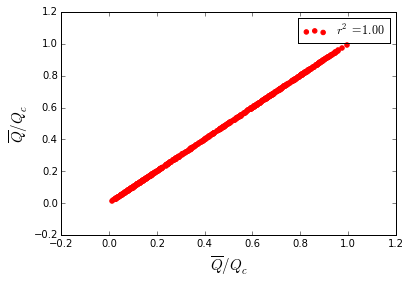

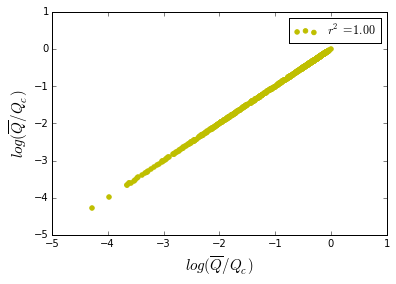

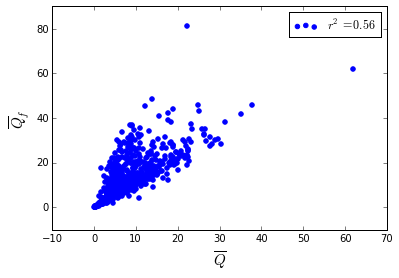

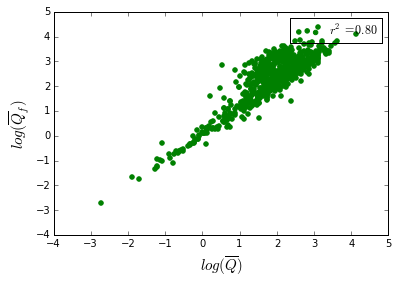

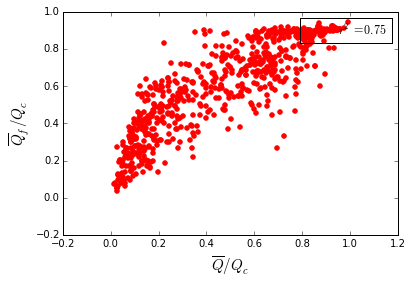

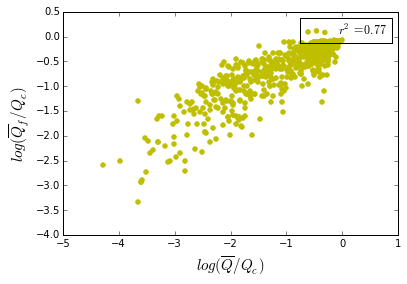

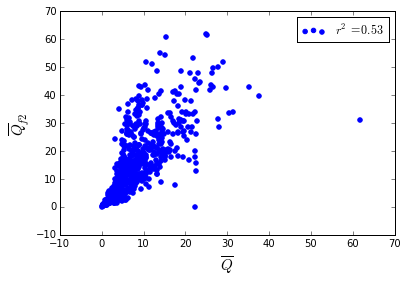

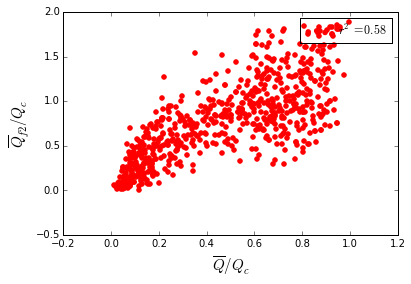

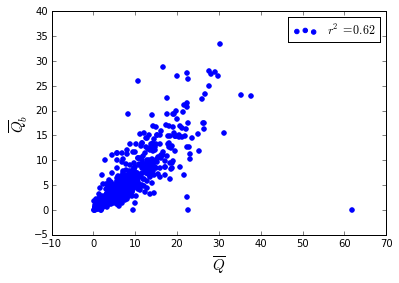

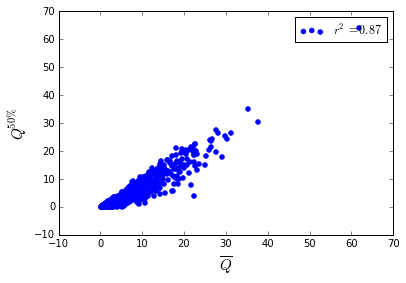

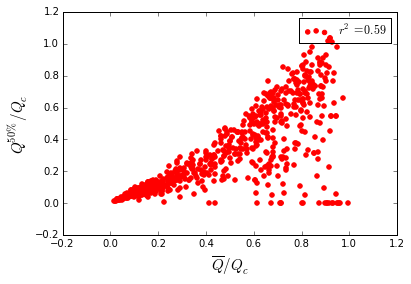

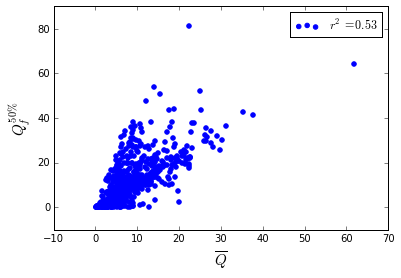

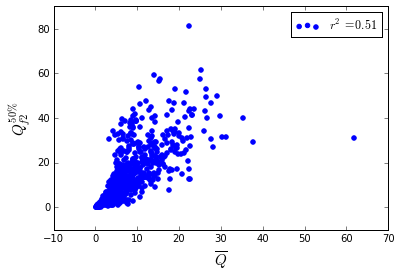

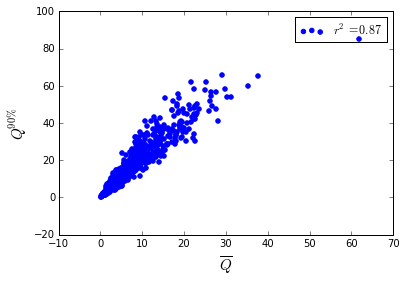

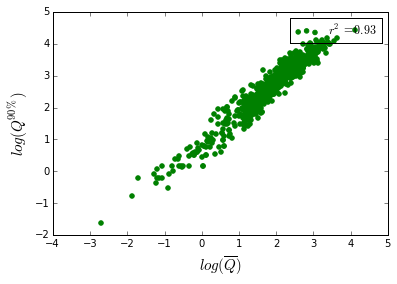

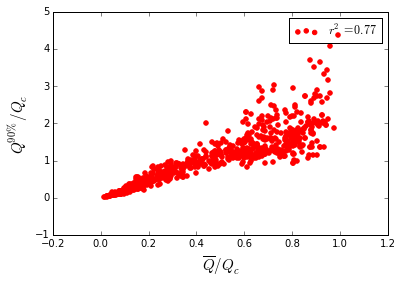

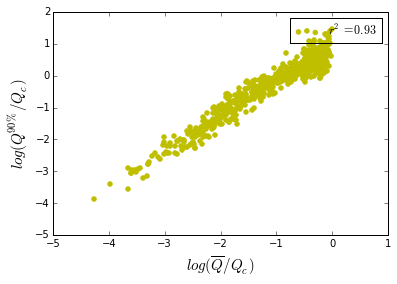

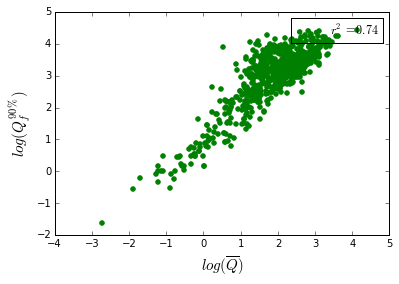

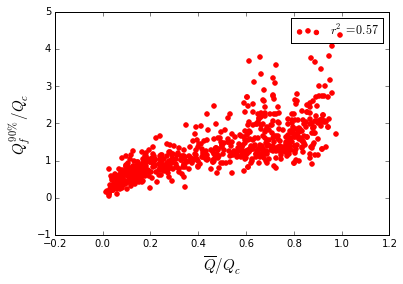

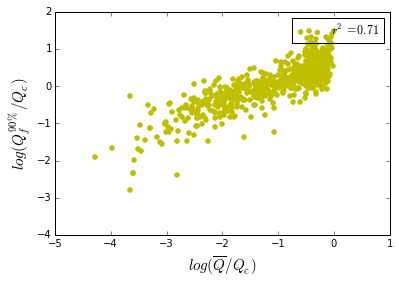

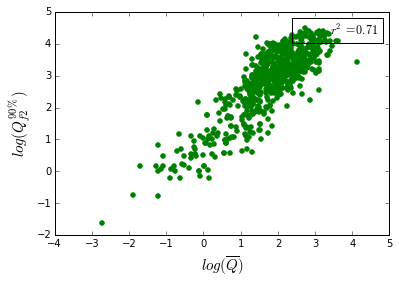

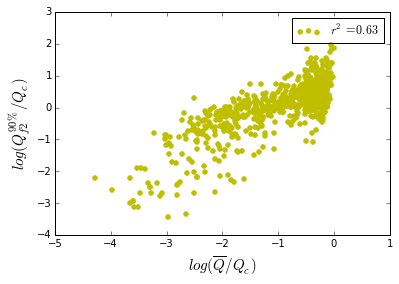

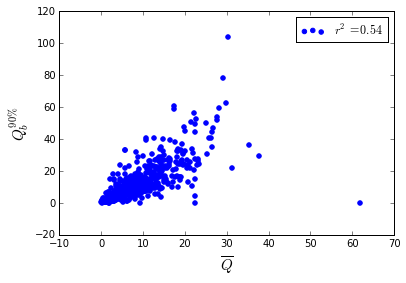

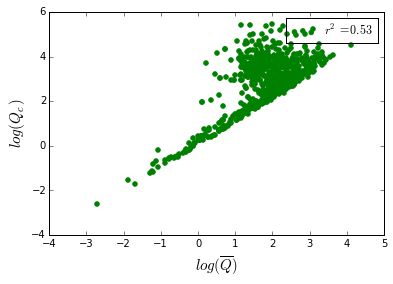

In [4]:
plot_corr('Qm')

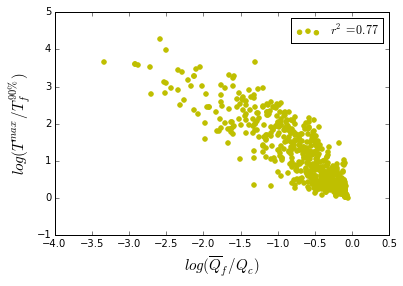

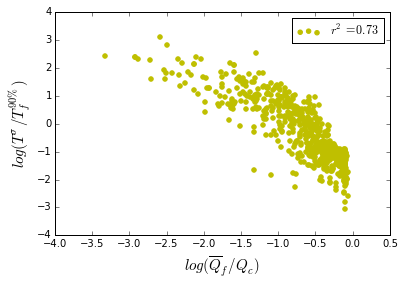

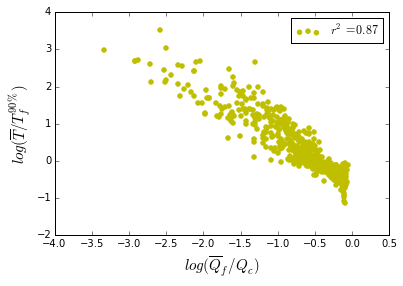

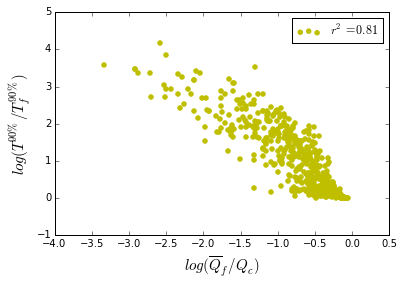

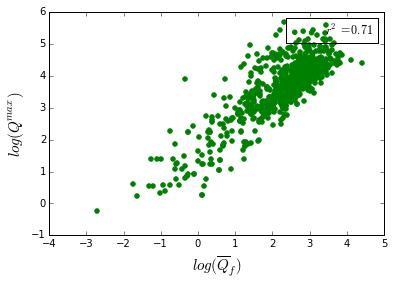

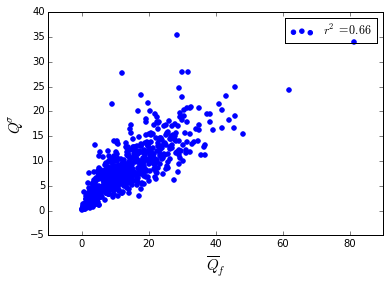

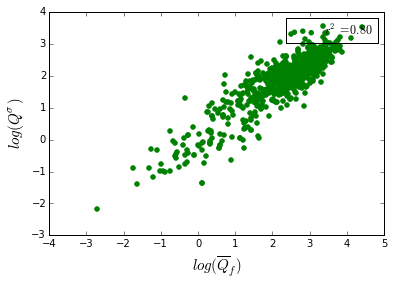

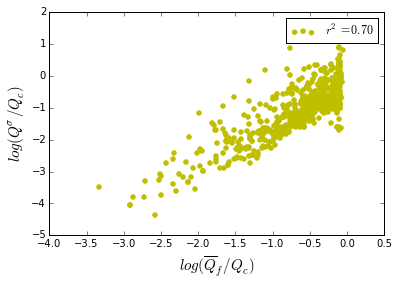

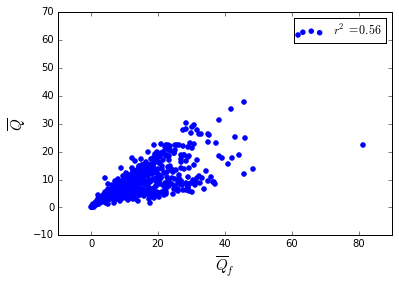

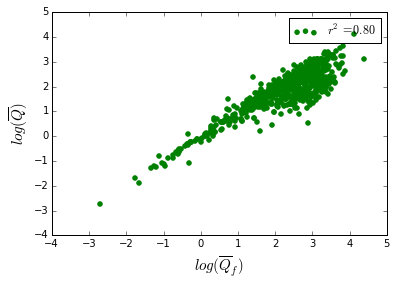

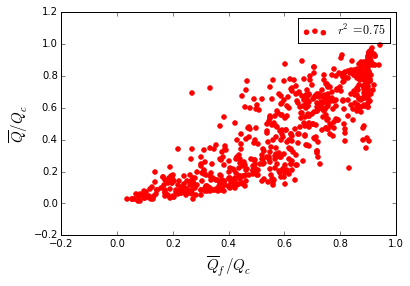

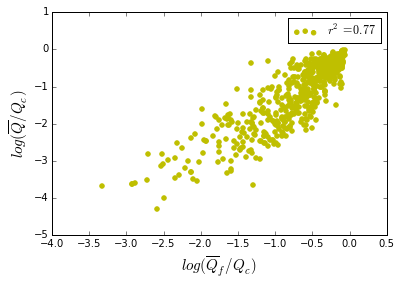

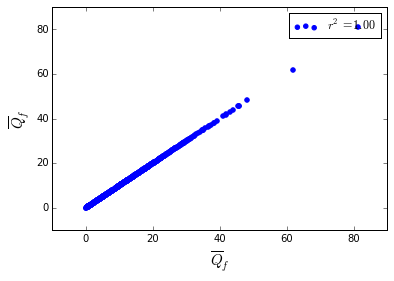

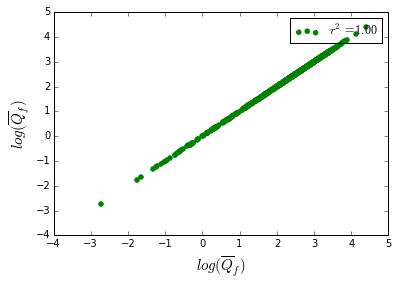

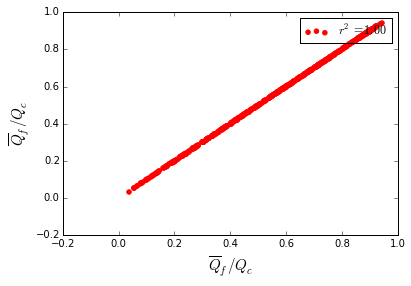

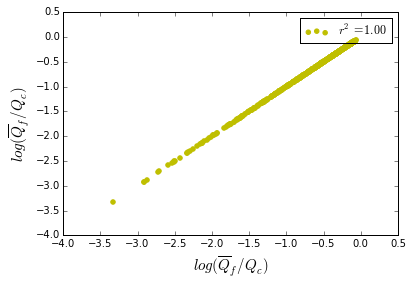

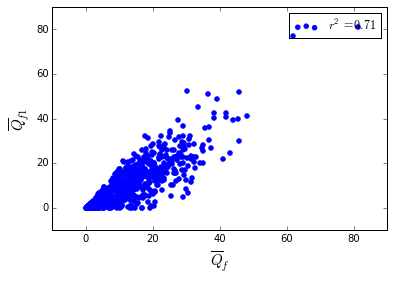

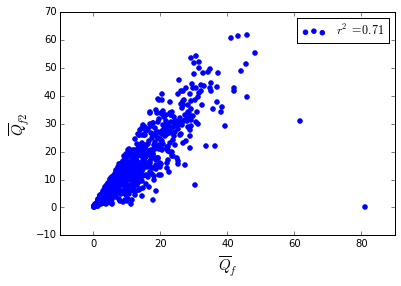

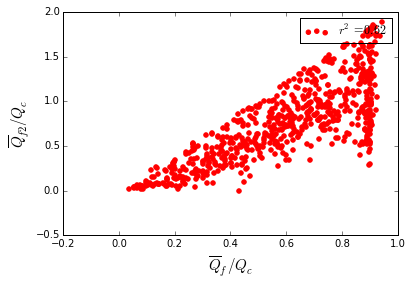

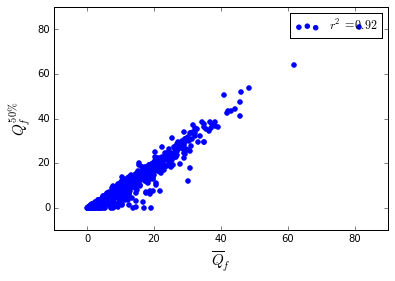

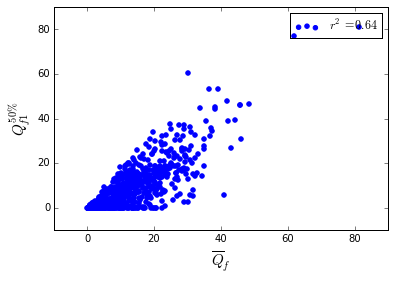

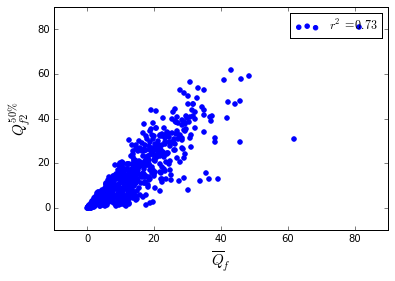

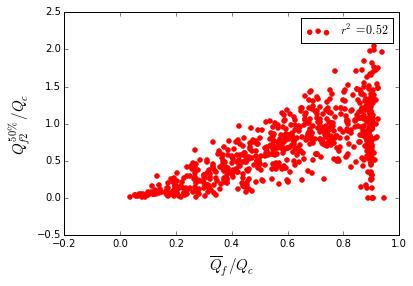

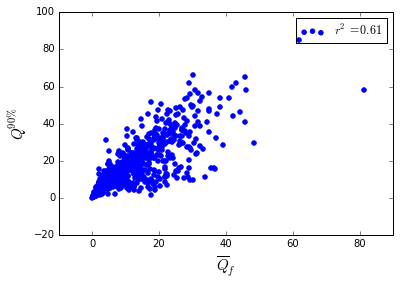

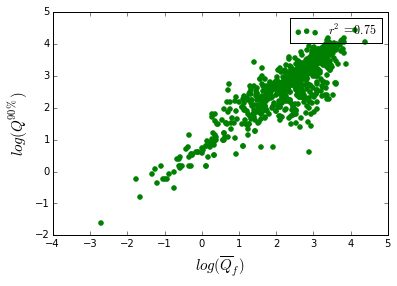

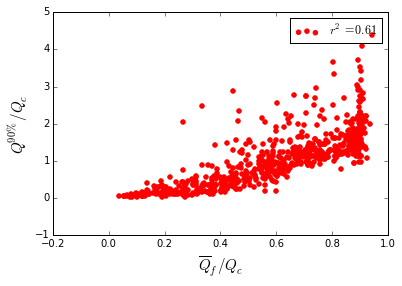

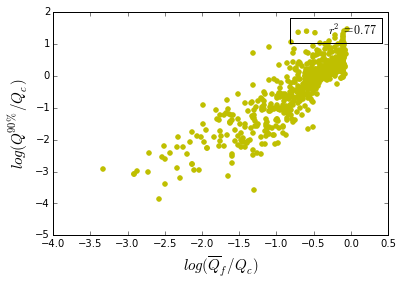

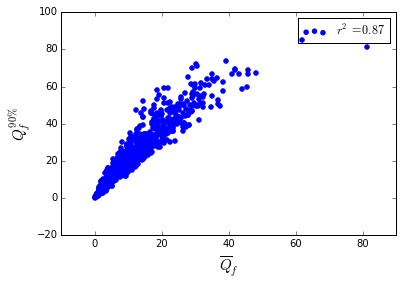

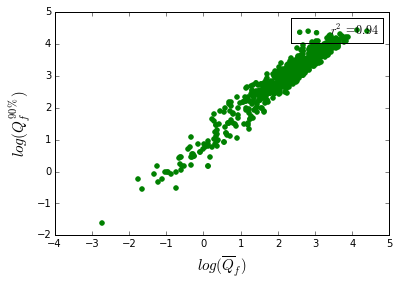

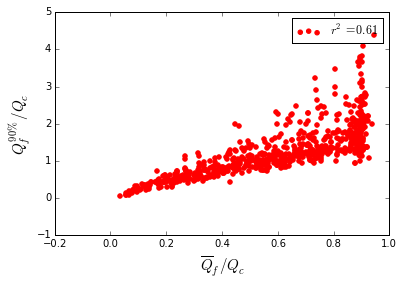

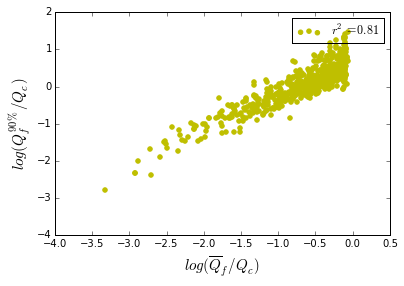

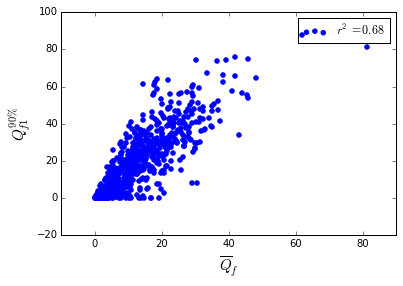

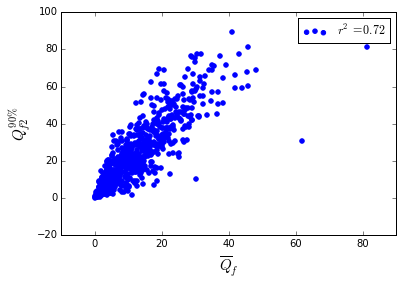

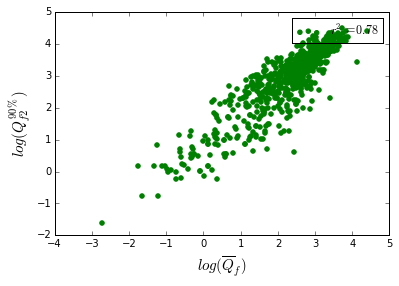

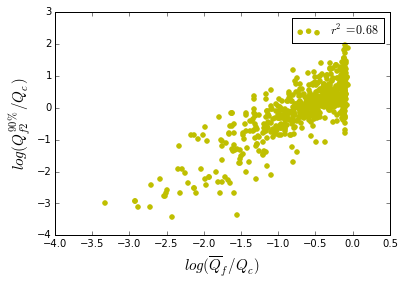

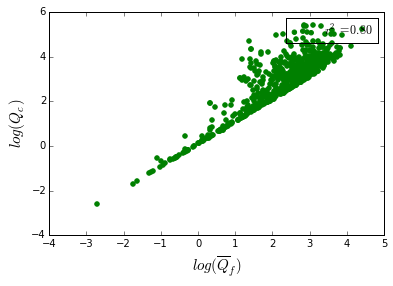

In [5]:
# Print correlations against Qpred

plot_corr('Qmf')

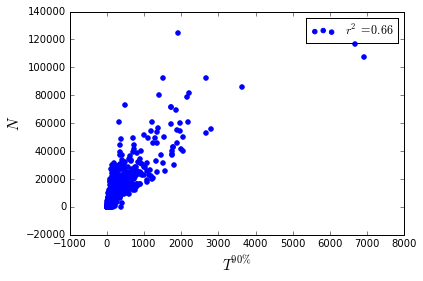

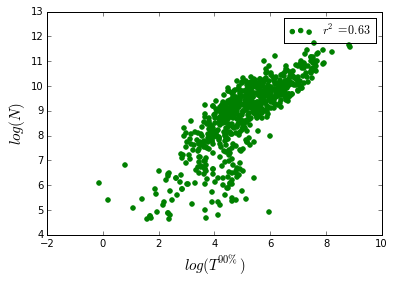

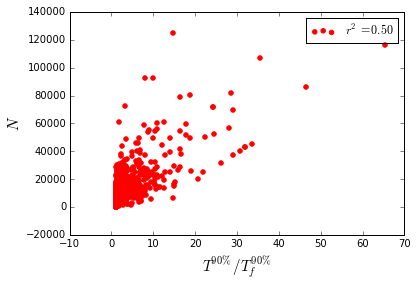

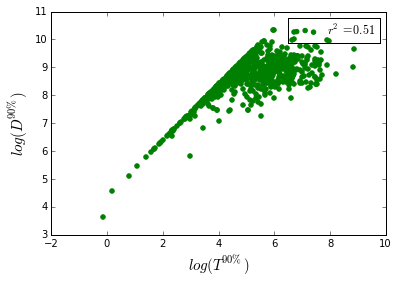

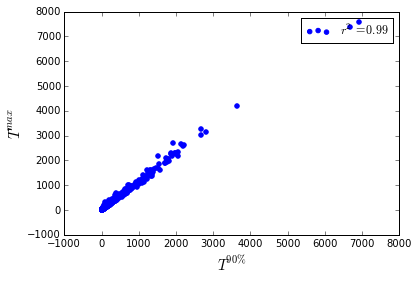

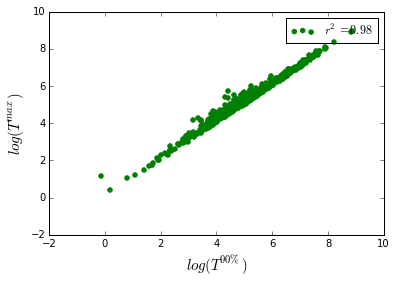

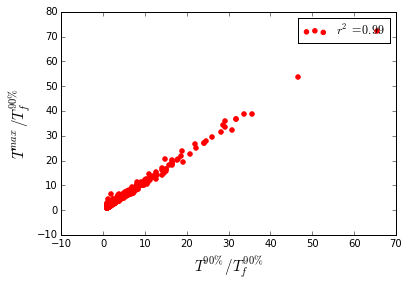

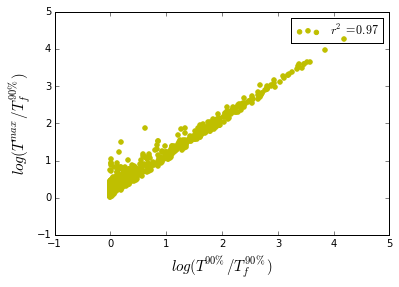

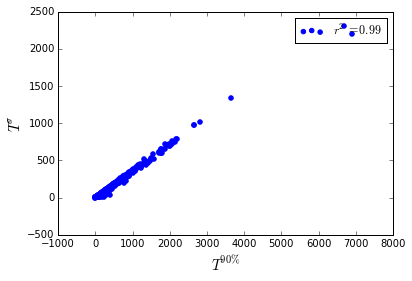

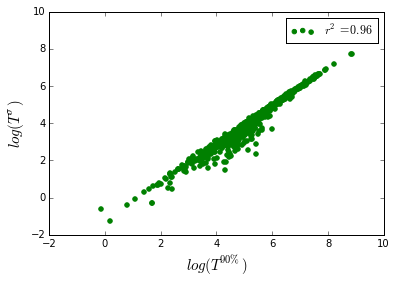

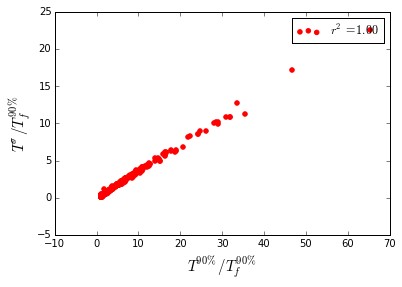

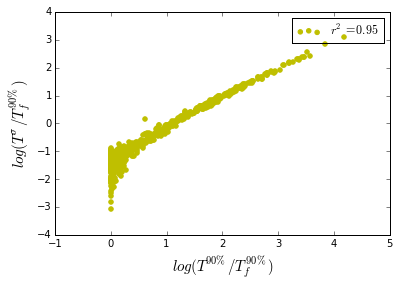

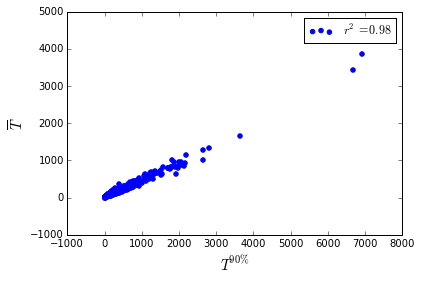

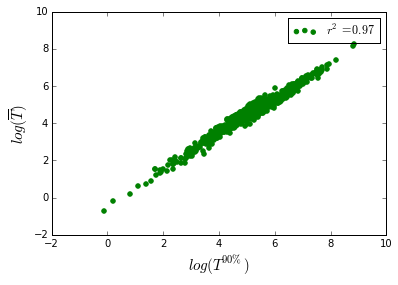

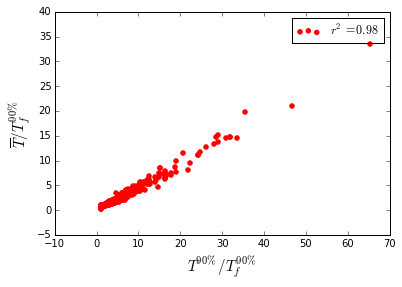

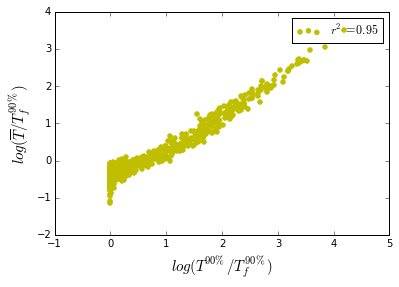

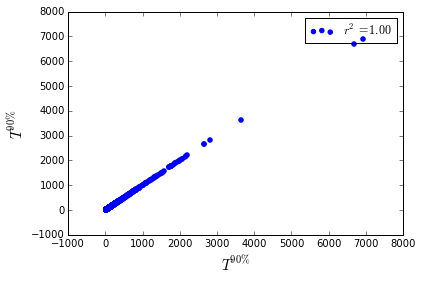

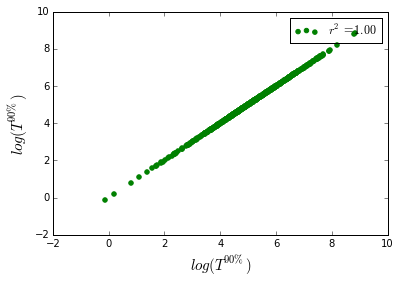

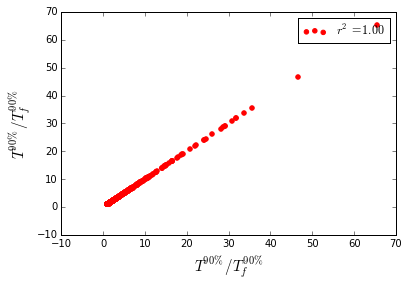

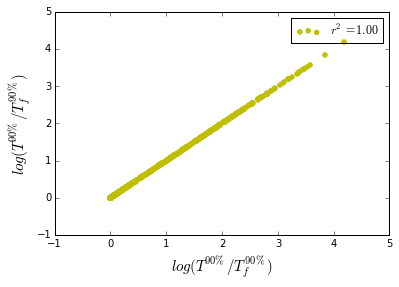

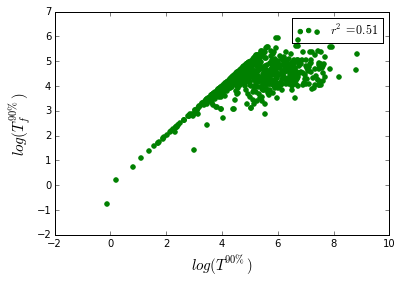

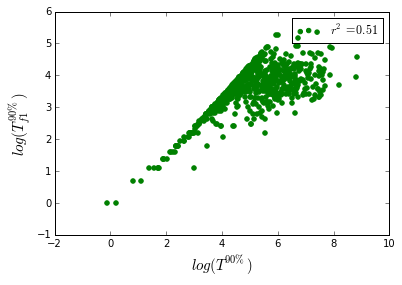

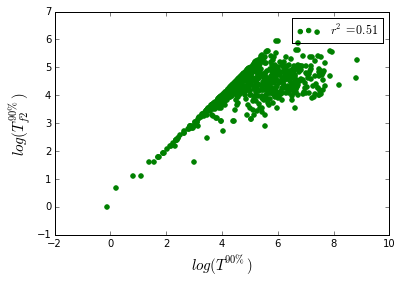

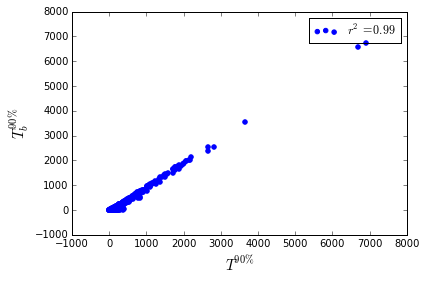

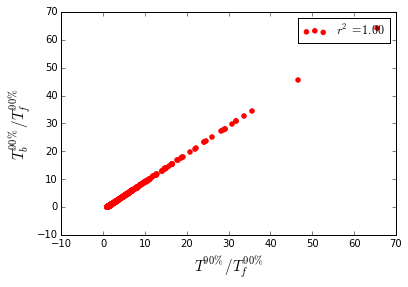

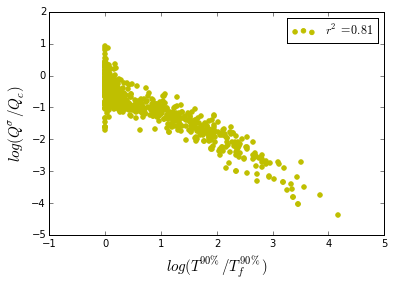

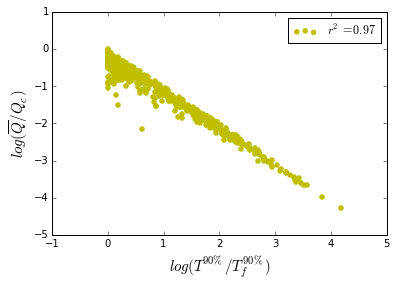

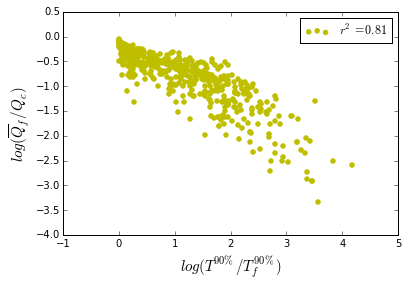

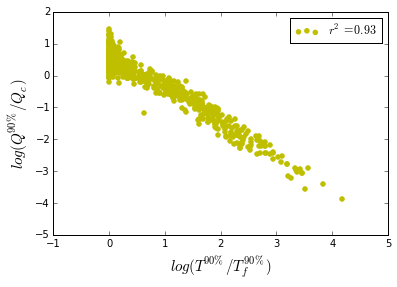

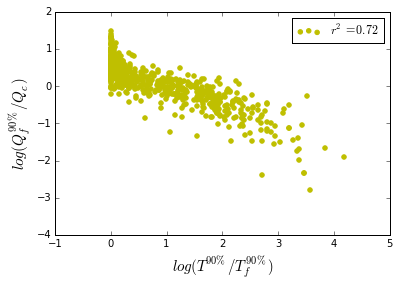

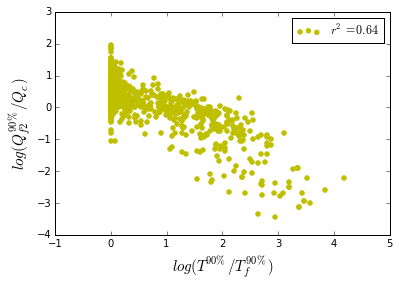

In [6]:
# Print correlations against Q90f

plot_corr('T90')

In [10]:
import random
noofCA = len(mat[0])
dataindex = range(noofCA)
random.shuffle(dataindex)
train = dataindex[:int(noofCA/2)]
test = dataindex[int(noofCA/2):]

Between 1 and 2, change of 9.56 observed (9.180,8.379).
Between 2 and 3, change of 2.31 observed (8.379,8.190).
Between 3 and 4, change of 0.17 observed (8.190,8.176).
Between 4 and 5, change of 0.07 observed (8.176,8.170).
Between 5 and 6, change of 0.20 observed (8.170,8.154).
Between 6 and 7, change of 0.12 observed (8.154,8.144).
Between 7 and 8, change of 0.01 observed (8.144,8.143).
Between 8 and 9, change of 0.02 observed (8.143,8.142).
We are going to go with order of 1.
theta =  0.733713237825 gamma =  1.12160832314


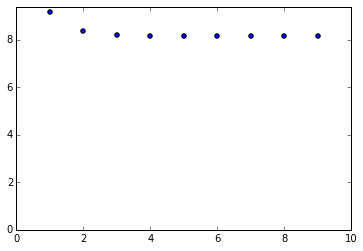

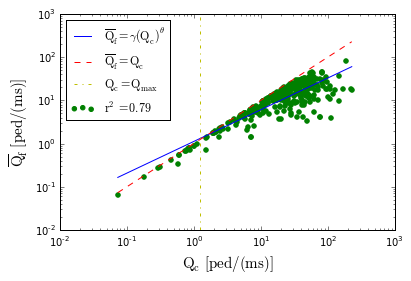

In [11]:
    l1 = 'Qp'
    l2 = 'Qmf'
    
    i1 = lab.index(l1)
    i2 = lab.index(l2)
    
    x = logmat[i1][train]
    y = logmat[i2][train]
    
    # function that returns a vector of deviation from best line of fit
    def deviation(x,y,f):
        y_mean = np.polyval(f,x)
        return abs(y_mean-y)
    
    plt.figure()
    
    # what order to use in the polyfit function?
    prev = 0
    tol_order = 0
    for order in range(1,10):
        f = np.polyfit(x,y,order)
        this = np.sqrt(sum(np.square(deviation(x,y,f))))
        if prev != 0:
            change = (prev/this)-1
            if change < 0.1 and tol_order == 0:
                tol_order = order-1
            print 'Between %i and %i,'%(order-1,order),'change of %0.2f observed (%0.3f,%0.3f).'%(change*100,prev,this)
        plt.scatter(order,this)  
        prev = this # Take the previous value
    
    plt.ylim(0,None)
    
    print 'We are going to go with order of %i.'%tol_order
    
    plt.figure()
        
    # from the graph above, using higher order than 3 does not offer significant advantage in minimising deviation
    f = np.polyfit(x,y,tol_order)
    
    c = np.corrcoef(x,y)[0][1]**2
    
    xplot = mat[i1][train]
    yplot = mat[i2][train]
    
    plt.scatter(xplot,yplot,color='g',label='$\mathrm{r^2 = %0.2f}$'%c)
    
    plt.xscale('log')
    plt.yscale('log')
    
    x_range = np.linspace(min(xplot),max(xplot),100)
    plt.plot(x_range,x_range**f[0]*np.exp(f[1]),'b-',label='$\mathrm{{ {1} = \gamma ({0})^{{\\theta}} }}$'.format(pl[l1],pl[l2])) # A red solid line
    plt.plot(x_range,x_range,'r--',label='$\mathrm{{{1} = {0}}}$'.format(pl[l1],pl[l2]))
    
    import math
    
    theta,gamma = f
    gamma = math.exp(gamma)

    
    print 'theta = ', theta, 'gamma = ',gamma
    
    # For fitting y = Ae^(Bx), 
    # take the logarithm of both side gives log y = Bx + log A.
    # So just fit log y against x.
    
    Qmax = abm.fd.kOpt*abm.fd.velocity(abm.fd.kOpt)/60
    plt.axvline(Qmax,c='y',linestyle='-.',label='$\mathrm{Q_c = Q_{max}}$')    
    
    plt.legend(loc='upper left') # make a legend in the best location
        
    fontsize=15
    plt.xlabel('$\mathrm{{{0} \ {1}}}$'.format(pl[l1],unit[l1]),fontsize=fontsize)
    plt.ylabel('$\mathrm{{{0} \ {1}}}$'.format(pl[l2],unit[l2]),fontsize=fontsize) # labels again
    plt.gcf().subplots_adjust(bottom=0.15)
        
    # plt.xlabel("$Q_s^{\overline{f}}/Q_p$") # labels again
    # plt.ylabel("$ln(T_s^{90\%}/T_f^{90\%})$")
    plt.savefig('../PhD/Papers/2014.12.untitled/figs/{0}-{1}.pdf'.format(l1,l2))

Between 1 and 2, change of 6.23 observed (10.734,10.104).
Between 2 and 3, change of 0.06 observed (10.104,10.098).
Between 3 and 4, change of 0.38 observed (10.098,10.059).
Between 4 and 5, change of 1.27 observed (10.059,9.933).
Between 5 and 6, change of 0.12 observed (9.933,9.921).
Between 6 and 7, change of 0.09 observed (9.921,9.912).
Between 7 and 8, change of 0.03 observed (9.912,9.909).
Between 8 and 9, change of 0.07 observed (9.909,9.903).
We are going to go with order of 1.
alpha =  -1.4366639495 beta =  0.922948887505


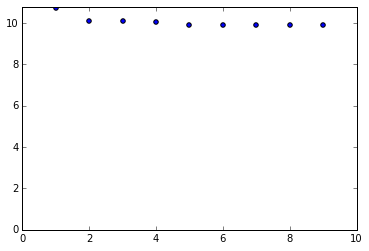

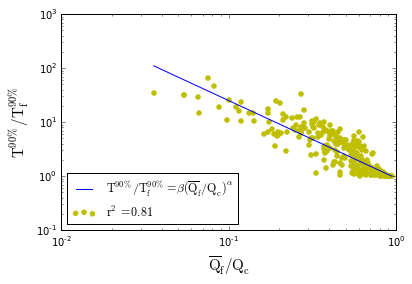

In [12]:
    l1 = 'Qmf'
    l2 = 'T90'
    
    i1 = lab.index(l1)
    i2 = lab.index(l2)
    
    x = lognormmat[i1]
    y = lognormmat[i2]
    
    # function that returns a vector of deviation from best line of fit
    def deviation(x,y,f):
        y_mean = np.polyval(f,x)
        return abs(y_mean-y)
    
    plt.figure()
    
    # what order to use in the polyfit function?
    prev = 0
    tol_order = 0
    for order in range(1,10):
        f = np.polyfit(x,y,order)
        this = np.sqrt(sum(np.square(deviation(x,y,f))))
        if prev != 0:
            change = (prev/this)-1
            if change < 0.1 and tol_order == 0:
                tol_order = order-1
            print 'Between %i and %i,'%(order-1,order),'change of %0.2f observed (%0.3f,%0.3f).'%(change*100,prev,this)
        plt.scatter(order,this)  
        prev = this # Take the previous value
    
    plt.ylim(0,None)
    
    print 'We are going to go with order of %i.'%tol_order
    
    plt.figure()
        
    # from the graph above, using higher order than 3 does not offer significant advantage in minimising deviation
    f = np.polyfit(x,y,tol_order)
    
    c = np.corrcoef(x,y)[0][1]**2
    
    xplot = normmat[i1][train]
    yplot = normmat[i2][train]
    
    plt.scatter(xplot,yplot,color='y',label='$\mathrm{r^2 = %0.2f}$'%c)
    
    plt.xscale('log')
    plt.yscale('log')
    
    # For fitting y = Ae^(Bx), 
    # take the logarithm of both side gives log y = Bx + log A.
    # So just fit log y against x.    
    alpha,beta = f
    beta = math.exp(beta)    
    print 'alpha = ', alpha, 'beta = ',beta
    
    x_range = np.linspace(min(xplot),max(xplot),100)
    plt.plot(x_range,x_range**alpha*beta,'b-',label='$\mathrm{{ {1} = \\beta ({0})^{{\\alpha}} }}$'.format(npl[l1],npl[l2])) # A red solid line
        
    plt.legend(loc='lower left') # make a legend in the best location
        
    fontsize=15
    plt.xlabel('$\mathrm{{{0}}}$'.format(npl[l1]),fontsize=fontsize)
    plt.ylabel('$\mathrm{{{0}}}$'.format(npl[l2]),fontsize=fontsize) # labels again
    plt.gcf().subplots_adjust(bottom=0.15)    
    
    plt.savefig('../PhD/Papers/2014.12.untitled/figs/{0}-{1}.pdf'.format(nl[l1].replace('/',':'),nl[l2].replace('/',':')))

In [13]:
    l0 = 'T90f'
    l1 = 'Qp'
    l2 = 'T90'
    
    i0 = lab.index(l0)
    i1 = lab.index(l1)
    i2 = lab.index(l2)
    
    x0 = mat[i0][test]
    x1 = mat[i1][test]
    y = mat[i2][test]

In [14]:
omega = beta*gamma**alpha
phi = alpha*(theta-1)
print 'omega = ',omega, 'phi=', phi

omega =  0.782658960557 phi= 0.382564591445


In [15]:
x=omega*x0*x1**phi

[[ 1.          0.44965935]
 [ 0.44965935  1.        ]]
[[ 1.          0.73136294]
 [ 0.73136294  1.        ]]
zeta =  1.16071096992 eta= 0.436058371944


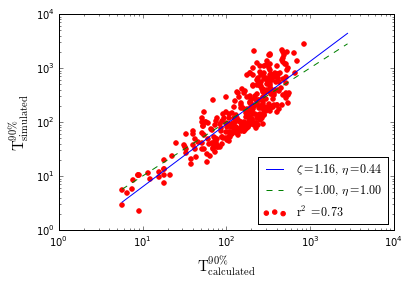

In [16]:
print np.corrcoef(x,y)**2
logx = np.log(x)
logy = np.log(y)
print np.corrcoef(logx,logy)**2

plt.scatter(x,y,color='r',label='$\mathrm{r^2 = %0.2f}$'%np.corrcoef(logx,logy)[0,1]**2)
plt.xscale('log')
plt.yscale('log')

f = np.polyfit(logx,logy,tol_order)
zeta, eta = f
eta = np.exp(eta)

print 'zeta = ',zeta, 'eta=', eta

x_range = np.linspace(min(x),max(y),100)
plt.plot(x_range,x_range**zeta*eta,'b-',label='$\mathrm{ \zeta = %0.2f,\ \eta = %0.2f }$'%(zeta,eta)) # A red solid line

plt.plot(x_range,x_range,'g--',label='$\mathrm{ \zeta = 1.00,\ \eta = 1.00 }$') # A red solid line

plt.legend(loc='lower right')

plt.xlabel('$\mathrm{{{0}_{{calculated}}}}$'.format(pl[l2]),fontsize=fontsize)
plt.ylabel('$\mathrm{{{0}_{{simulated}}}}$'.format(pl[l2]),fontsize=fontsize) # labels again
plt.gcf().subplots_adjust(bottom=0.15)    

plt.savefig('../PhD/Papers/2014.12.untitled/figs/T90-T90.pdf')

In [17]:
len(train)

347

In [18]:
len(test)

348